In [1]:
import torch
from model_builder import build_lstm_model
from main import main
from trainer import evaluate_pytorch_model
from visualizer import plot_predictions

from torch.utils.data import DataLoader, TensorDataset
import torch
from data_loader import load_and_preprocess_data, create_dataset_for_lstm
from sklearn.model_selection import train_test_split

from config import MODEL_PATH

import matplotlib.pyplot as plt

LimiXPredictor 导入失败。请确保已安装 LimiX 库及其依赖。


## Pretraining

In [2]:
scaled_data, scaler, input_feature_indices, target_indices, existing_features, existing_targets = load_and_preprocess_data()
X, y = create_dataset_for_lstm(scaled_data, input_feature_indices, target_indices)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

使用球磨机1的输入变量
对应的目标变量:
['磨浮工段1号球磨机旋流器溢流+80目', '磨浮工段1号球磨机旋流器溢流-200目']
--- 因低方差被移除的列 (15)---
  1. 磨浮工段1号球磨机4#旋流器运行
  2. 磨浮工段1号球磨机6#旋流器运行
  3. 磨浮工段1号球磨机磨机主电机运行
  4. 磨浮工段1号球磨机砂泵运行
  5. 磨浮工段1号球磨机矿石比重
  6. 磨浮工段1号球磨机2#旋流器运行
  7. 磨浮工段1号球磨机砂泵排污阀运行
  8. 磨浮工段1号球磨机7#旋流器运行
  9. 磨浮工段1号球磨机3#旋流器运行
  10. 磨浮工段1号球磨机水量（检化）
  11. 磨浮工段1号球磨机给矿皮带运行
  12. 磨浮工段1号球磨机5#旋流器运行
  13. 磨浮工段1号球磨机旋流器上浆（给矿矿浆）浓度
  14. 磨浮工段1号球磨机2#高压油泵运行
  15. 磨浮工段1号球磨机1#旋流器运行
-----------------------


((51792, 60, 29), (12948, 60, 29), (51792, 2), (12948, 2))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 转换为 PyTorch Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# 创建 DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
for batch_X, batch_y in train_loader:
    print(batch_X.shape, batch_y.shape)
    break

torch.Size([32, 60, 29]) torch.Size([32, 2])


In [ ]:
51792/128

404.625

## Train the model


--- 工业生产时序数据多输出预测项目 ---

阶段1: 数据加载和预处理...
使用球磨机1的输入变量
对应的目标变量:
['磨浮工段1号球磨机旋流器溢流+80目', '磨浮工段1号球磨机旋流器溢流-200目']
--- 因低方差被移除的列 (15)---
  1. 磨浮工段1号球磨机砂泵运行
  2. 磨浮工段1号球磨机给矿皮带运行
  3. 磨浮工段1号球磨机磨机主电机运行
  4. 磨浮工段1号球磨机矿石比重
  5. 磨浮工段1号球磨机5#旋流器运行
  6. 磨浮工段1号球磨机4#旋流器运行
  7. 磨浮工段1号球磨机旋流器上浆（给矿矿浆）浓度
  8. 磨浮工段1号球磨机2#旋流器运行
  9. 磨浮工段1号球磨机砂泵排污阀运行
  10. 磨浮工段1号球磨机7#旋流器运行
  11. 磨浮工段1号球磨机水量（检化）
  12. 磨浮工段1号球磨机1#旋流器运行
  13. 磨浮工段1号球磨机6#旋流器运行
  14. 磨浮工段1号球磨机3#旋流器运行
  15. 磨浮工段1号球磨机2#高压油泵运行
-----------------------
用于模型训练的数据形状: (64800, 31)

阶段2: 模型选择与预测...
构建 PyTorch LSTM 模型。
LSTMModel(
  (lstm): LSTM(29, 100, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=100, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)

阶段2.1: 训练 PyTorch 模型...

开始训练 PyTorch 模型...
LSTMModel(
  (lstm): LSTM(29, 100, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=100, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=2, bia

/home/yaojian/codes/grinding_analysis/visualizer.py:38: UserWarning: Glyph 30952 (\N{CJK UNIFIED IDEOGRAPH-78E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/yaojian/codes/grinding_analysis/visualizer.py:38: UserWarning: Glyph 28014 (\N{CJK UNIFIED IDEOGRAPH-6D6E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/yaojian/codes/grinding_analysis/visualizer.py:38: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/yaojian/codes/grinding_analysis/visualizer.py:38: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/yaojian/codes/grinding_analysis/visualizer.py:38: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/yaojian/codes/grinding_analysis/visualizer.py:38: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from font(s) DejaVu Sans.
  plt.t

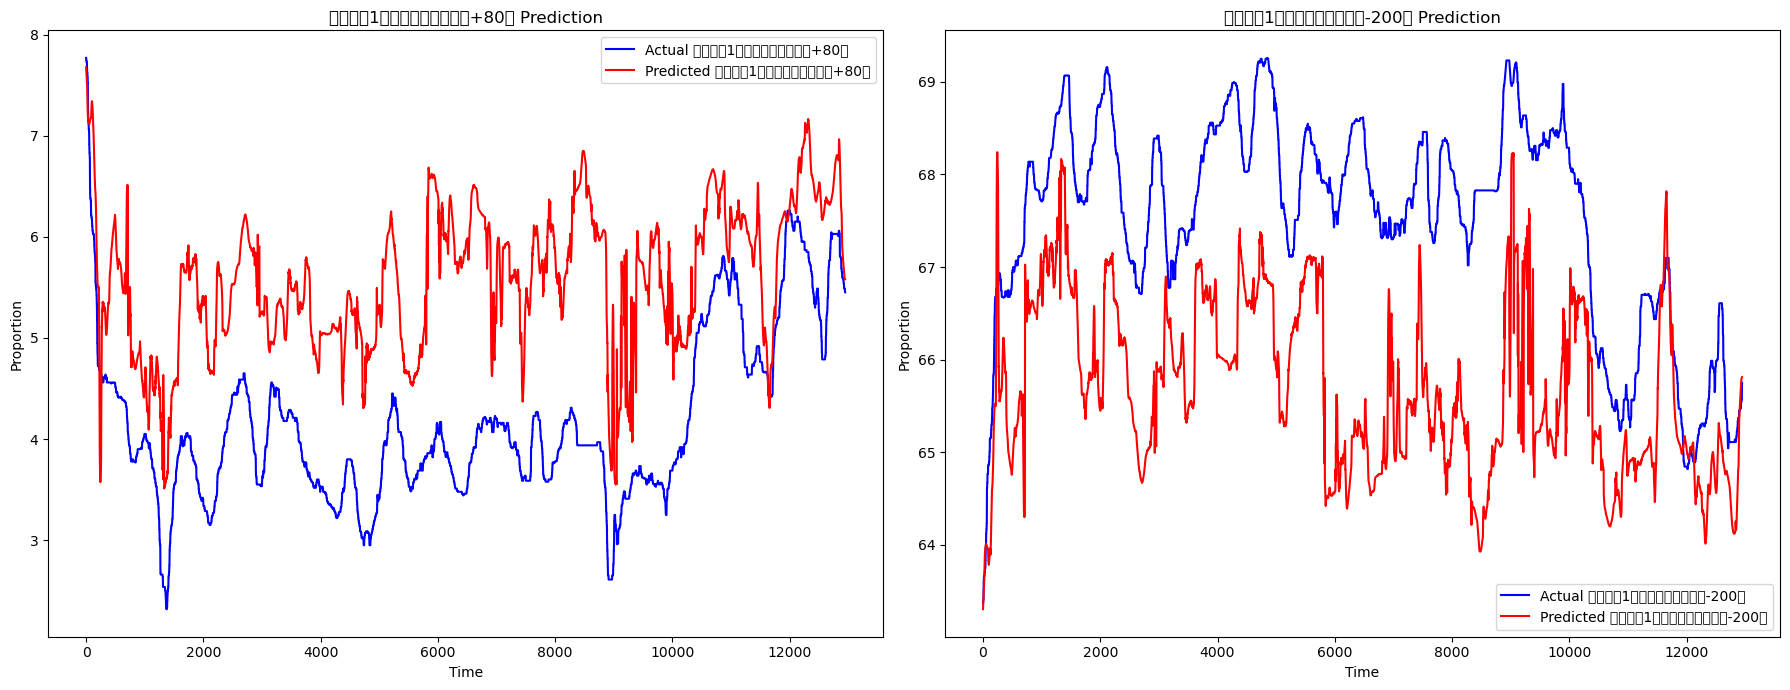

预测图表已保存至 results/predictions.png

--- 项目运行完成 --- 


In [2]:
main(model_choice='lstm')

## After training

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


input_size = X_test.shape[2]
output_size = y_test.shape[1]  # 如果你有 y_test

model = build_lstm_model(input_size, output_size).to(device)
state = torch.load(MODEL_PATH, map_location=device)
model.load_state_dict(state)
model.eval()

# with torch.no_grad():
#     X_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
#     preds = model(X_tensor).cpu().numpy()

LSTMModel(
  (lstm): LSTM(29, 100, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=100, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)

In [4]:
inversed_y_test, inversed_predictions = evaluate_pytorch_model(model, X_test, y_test, scaler, target_indices, scaled_data.shape[1])


开始进行 PyTorch 模型预测...
PyTorch 模型预测完成。


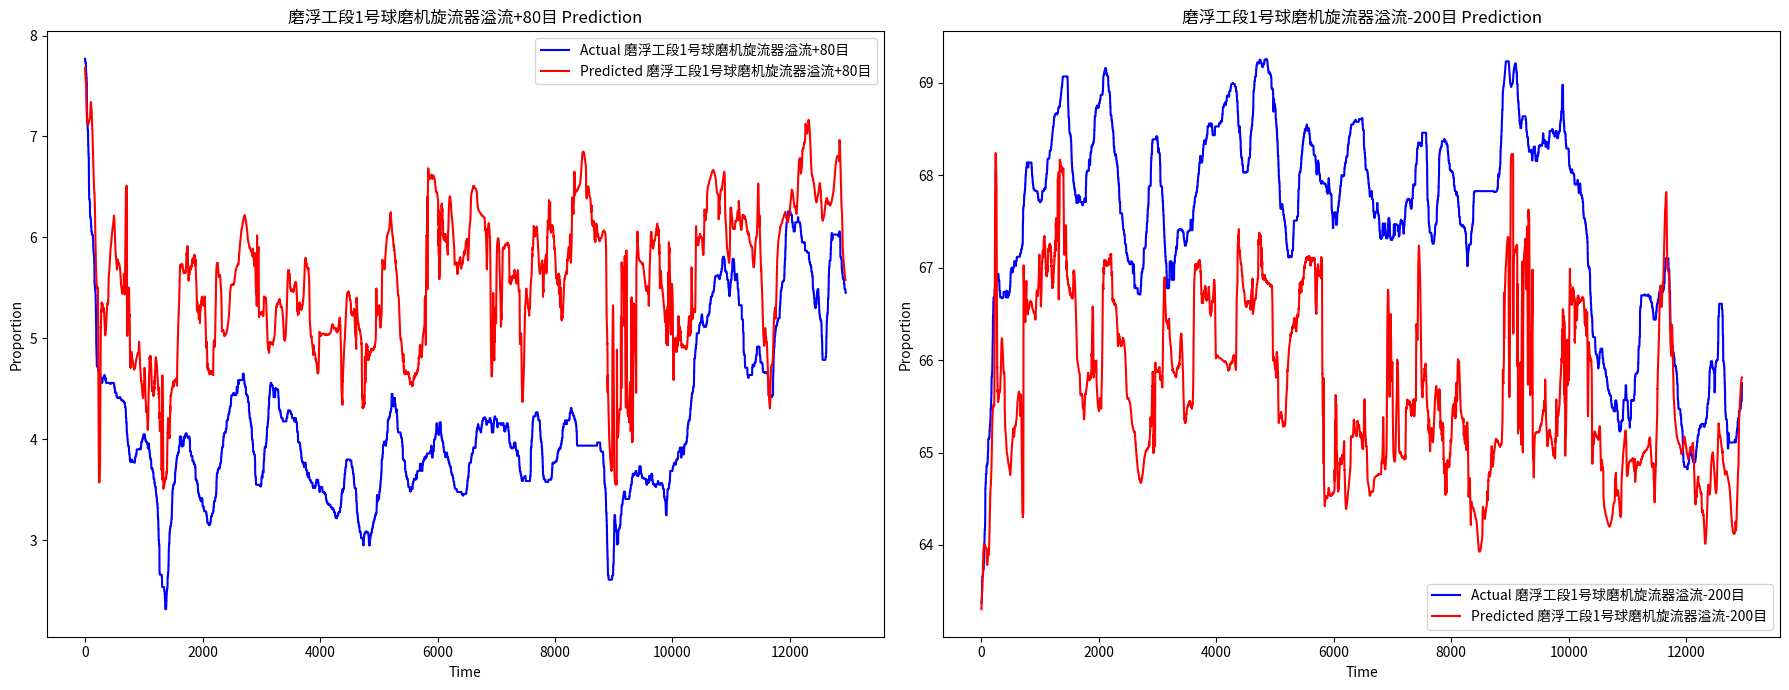

预测图表已保存至 results/predictions.png


In [5]:
plot_predictions(inversed_y_test, inversed_predictions, existing_targets)
